In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import json
import folium
import networkx as nx

# 1. load data
The data file introduction is below:
1. **u.data**:   The full u data set, `100000 ratings` by `943 users` on `1682 items`. Each user has rated at least 20 movies.  Users and items are numbered consecutively from 1.  The data is randomly ordered. The time stamps are unix seconds since 1/1/1970 UTC.   

2. **u.item**: Information about the items (movies); The last `19 fields` are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not; movies can be in several genres at once. 

3. **u.genre**: A list of the genres.

4. **u.user**: Demographic information about the users

5. **u.occupation**: A list of the occupations.

# 2. data analysis

## 2.1 Movie data

In [2]:
############################### Genre of the movies ############################### 
genre_data= pd.read_csv('ml-100k/u.genre',sep='|',names=["movie_type", "type_id"])
genre_data.head()

movie_type  type_id
0     unknown        0
1      Action        1
2   Adventure        2
3   Animation        3
4  Children's        4

In [3]:
############################### Information about the items (movies) ###############################
column_names = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", \
              "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
              "Sci-Fi", "Thriller", "War", "Western"]
movies_data = pd.read_csv('ml-100k/u.item',sep='|', names=column_names,encoding = "ISO-8859-1")
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.rename(columns = {'movie_id':'item_id'}, inplace = True) 
movies_data

item_id                                movie_title release_date  \
0           1                           Toy Story (1995)   1995-01-01   
1           2                           GoldenEye (1995)   1995-01-01   
2           3                          Four Rooms (1995)   1995-01-01   
3           4                          Get Shorty (1995)   1995-01-01   
4           5                             Copycat (1995)   1995-01-01   
...       ...                                        ...          ...   
1677     1678                          Mat' i syn (1997)   1998-02-06   
1678     1679                           B. Monkey (1998)   1998-02-06   
1679     1680                       Sliding Doors (1998)   1998-01-01   
1680     1681                        You So Crazy (1994)   1994-01-01   
1681     1682  Scream of Stone (Schrei aus Stein) (1991)   1996-03-08   

      video_release_date                                           IMDb_URL  \
0                    NaN  http://us.imdb.com/M/title-exact?Toy%20Story%2...   
1                    NaN  http://us.imdb.com/M/title-exact?GoldenEye%20(...   
2                    NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%...   
3                    NaN  http://us.imdb.com/M/title-exact?Get%20Shorty%...   
4                    NaN  http://us.imdb.com/M/title-exact?Copycat%20(1995)   
...                  ...                                                ...   
1677                 NaN  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...   
1678                 NaN  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...   
1679                 NaN      http://us.imdb.com/Title?Sliding+Doors+(1998)   
1680                 NaN  http://us.imdb.com/M/title-exact?You%20So%20Cr...   
1681                 NaN  http://us.imdb.com/M/title-exact?Schrei%20aus%...   

      unknown  Action  Adventure  Animation  Childrens  ...  Fantasy  \
0           0       0          0          1          1  ...        0   
1           0       1          1          0          0  ...        0   
2           0       0          0          0          0  ...        0   
3           0       1          0          0          0  ...        0   
4           0       0          0          0          0  ...        0   
...       ...     ...        ...        ...        ...  ...      ...   
1677        0       0          0          0          0  ...        0   
1678        0       0          0          0          0  ...        0   
1679        0       0          0          0          0  ...        0   
1680        0       0          0          0          0  ...        0   
1681        0       0          0          0          0  ...        0   

      Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0             0       0        0        0        0       0         0    0   
1             0       0        0        0        0       0         1    0   
2             0       0        0        0        0       0         1    0   
3             0       0        0        0        0       0         0    0   
4             0       0        0        0        0       0         1    0   
...         ...     ...      ...      ...      ...     ...       ...  ...   
1677          0       0        0        0        0       0         0    0   
1678          0       0        0        0        1       0         1    0   
1679          0       0        0        0        1       0         0    0   
1680          0       0        0        0        0       0         0    0   
1681          0       0        0        0        0       0         0    0   

      Western  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1677        0  
1678        0  
1679        0  
1680        0  
1681        0  

[1682 rows x 24 columns]

### duplicated records

In [4]:
movies_data[movies_data.duplicated('movie_title', False)].sort_values(by = 'movie_title').head()

item_id                   movie_title release_date  video_release_date  \
669       670         Body Snatchers (1993)   1993-01-01                 NaN   
572       573         Body Snatchers (1993)   1993-01-01                 NaN   
1649     1650       Butcher Boy, The (1998)   1998-01-01                 NaN   
1644     1645       Butcher Boy, The (1998)   1998-01-01                 NaN   
1233     1234  Chairman of the Board (1998)   1998-01-01                 NaN   

                                               IMDb_URL  unknown  Action  \
669   http://us.imdb.com/M/title-exact?Body%20Snatch...        0       0   
572   http://us.imdb.com/M/title-exact?Body%20Snatch...        0       0   
1649  http://us.imdb.com/M/title-exact?imdb-title-11...        0       0   
1644  http://us.imdb.com/M/title-exact?imdb-title-11...        0       0   
1233  http://us.imdb.com/Title?Chairman+of+the+Board...        0       0   

      Adventure  Animation  Childrens  ...  Fantasy  Film-Noir  Horror  \
669           0          0          0  ...        0          0       1   
572           0          0          0  ...        0          0       1   
1649          0          0          0  ...        0          0       0   
1644          0          0          0  ...        0          0       0   
1233          0          0          0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
669         0        0        0       1         1    0        0  
572         0        0        0       1         1    0        0  
1649        0        0        0       0         0    0        0  
1644        0        0        0       0         0    0        0  
1233        0        0        0       0         0    0        0  

[5 rows x 24 columns]

### NaN record
We find that there is a record contains NaN for most of its attributes. However, we later on also found that there are users who did rate this item. So we decide not to drop this record.

In [5]:
movies_data[movies_data.release_date.isnull()]

item_id movie_title release_date  video_release_date IMDb_URL  unknown  \
266      267     unknown          NaT                 NaN      NaN        1   

     Action  Adventure  Animation  Childrens  ...  Fantasy  Film-Noir  Horror  \
266       0          0          0          0  ...        0          0       0   

     Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266        0        0        0       0         0    0        0  

[1 rows x 24 columns]

In [6]:
movies_data[movies_data.index == 266]

item_id movie_title release_date  video_release_date IMDb_URL  unknown  \
266      267     unknown          NaT                 NaN      NaN        1   

     Action  Adventure  Animation  Childrens  ...  Fantasy  Film-Noir  Horror  \
266       0          0          0          0  ...        0          0       0   

     Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266        0        0        0       0         0    0        0  

[1 rows x 24 columns]

### Year Cleaning
The movies lie in a span of 77 years.

In [7]:
l = sorted(movies_data.release_date.dt.year.unique().tolist())
max(l)  - min(l) + 1

77.0

#### Histogram of movies w.r.t. release year

/home/leishengzhao/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


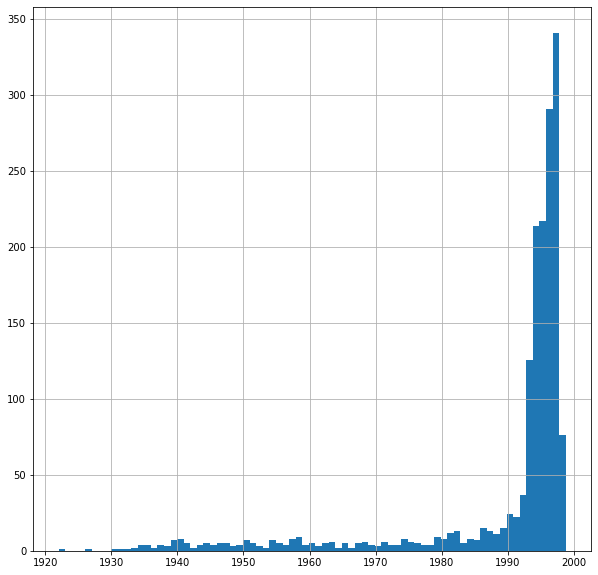

In [8]:
movies_data.release_date.hist(bins = 77, figsize = (10, 10))

Observing from the histogram showing the number of movies for each each, we notice that the movies mainly are released during 1990 and 1998. In order to facilitate the computation of similarity, we wish to aggregate years in which too few moives are released.

In [9]:
def compute_year_label(row):
    year = row['release_date'].year
    
    if 1920 <= year < 1950:
        return 1940
    elif 1950 <= year < 1970:
        return 1960
    elif 1970 <= year < 1980:
        return 1970
    elif 1980 <= year < 1990:
        return 1980
    else:
        return year

In [10]:
movies_data['year_label'] = movies_data.apply(lambda row: compute_year_label(row), axis = 1)

In [11]:
year_label_set = set(movies_data.year_label.unique().tolist())
year_label_set

{nan,
 1940.0,
 1960.0,
 1970.0,
 1980.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0}

### 2.1.1 statistical infos

#### Histogram of movies under each year label.

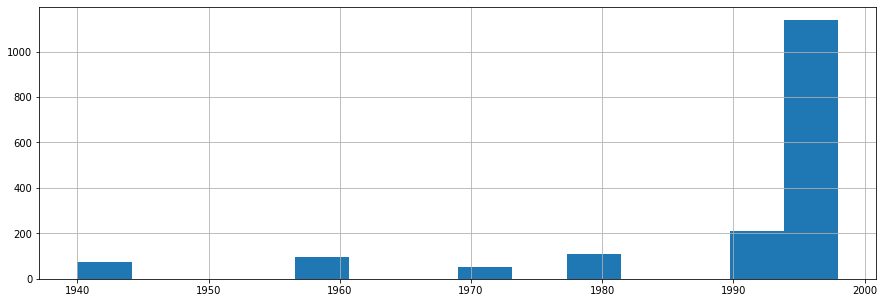

In [12]:
movies_data.year_label.hist(bins = len(year_label_set), figsize = (15, 5))

#### The number of movies that falls in each genre.

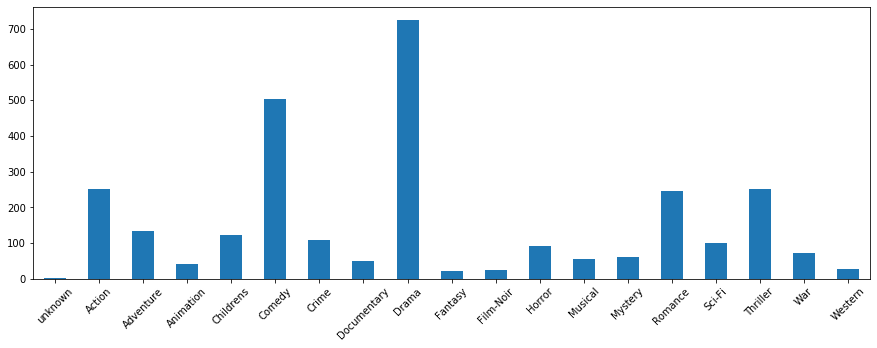

In [14]:
movies_data.sum()[movies_data.columns[5:-1]].plot(kind = 'bar', figsize = (15, 5),rot=45)

Below we take a glimpse of the percentage of each genere's movies in 1995, 96, 97 and 98.

In [67]:
movie_1995 = movies_data[movies_data['release_date'].dt.year == 1995]
movie_1996 = movies_data[movies_data['release_date'].dt.year == 1996]
movie_1997 = movies_data[movies_data['release_date'].dt.year == 1997]
movie_1998 = movies_data[movies_data['release_date'].dt.year == 1998]

In [68]:
genre_cls = ["unknown", "Action", "Adventure", "Animation", \
              "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", \
              "Sci-Fi", "Thriller", "War", "Western"]

Text(0.5, 1.0, 'genres percentage over year')

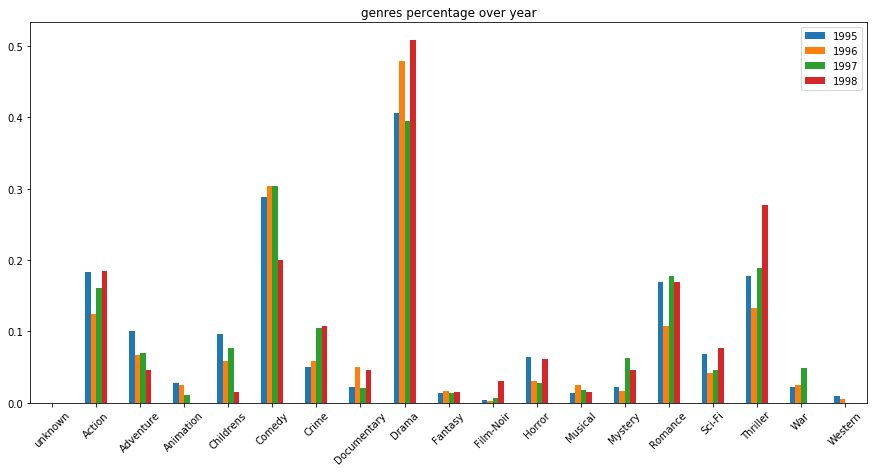

In [69]:
Year = {}
Year[1995] = movie_1995[genre_cls].sum()/len(movie_1995)
Year[1996] = movie_1996[genre_cls].sum()/len(movie_1996)
Year[1997] = movie_1997[genre_cls].sum()/len(movie_1997)
Year[1998] = movie_1998[genre_cls].sum()/len(movie_1998)
movie_year = pd.DataFrame(Year) 
axes = movie_year.plot.bar(rot=45,figsize=(15,7))
axes.set_title('genres percentage over year')

## 2.2 user data

In [146]:
############################### Demographic information about the users ###############################
column_names = ["user_id", "age", "gender", "occupation", "zip_code"]
user_data = pd.read_csv('ml-100k/u.user',sep='|', names=column_names)
user_data

user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]

In [249]:
############################### A list of the occupations(the jobs types of users). ############################### 
occupation_data = pd.read_csv('ml-100k/u.occupation',sep='|',names=["occupation"])
occupation_data = occupation_data.reset_index().rename(columns={'index':'occupation_id'})

occupation_data.head()

occupation_id     occupation
0              0  administrator
1              1         artist
2              2         doctor
3              3       educator
4              4       engineer

### 2.2.1 statistical info

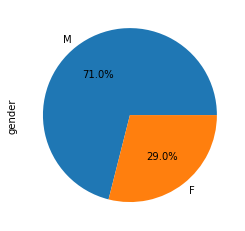

In [73]:
user_data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

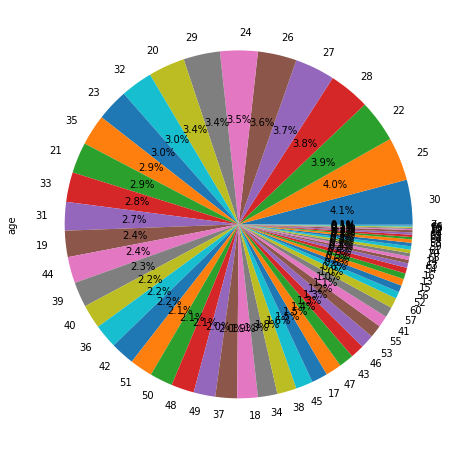

In [74]:
user_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(8,8))

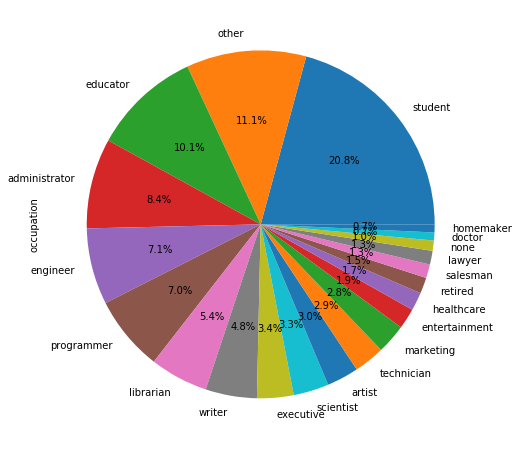

In [75]:
user_data['occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(8,8))

### 2.2.2 location

We wish to find the geographical distribution of the users and to show them on a map. The only information we are given about this is the zip code and we find out there are only two countries involving these zip codes: America and Canada. And below we find out the number of users in Canada.

In [245]:
canada = 0
for i in range(len(user_data)):
    if user_data.loc[i].zip_code.isdigit() == False:
        canada += 1

canada

18

Geopy is used to find the exact coordinate corresponding to a zip code. And this information is stored in a dictionary.

In [246]:
code_table = {x: (0, 0) for x in user_data.zip_code.unique().tolist()}

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="liu")

for zip_code in code_table:
    if code_table[zip_code] != (0, 0):
        continue
    
    query_code = zip_code
    
    if query_code.isdigit() == False:
        continue

    location = location = geolocator.geocode(query_code, country_codes = ['US'], timeout = 10)
    if not location:
        continue
    code_table[zip_code] = (location.latitude, location.longitude)

In [233]:
user_data['coordinate'] = user_data.apply(lambda row: code_table[row['zip_code']], axis = 1)

In [248]:
user_data.head()

user_id  age gender  occupation zip_code  \
0        1   24      M  technician    85711   
1        2   53      F       other    94043   
2        3   23      M      writer    32067   
3        4   24      M  technician    43537   
4        5   33      F       other    15213   

                              coordinate  
0  (32.2237655028609, -110.870918674932)  
1   (37.406948363578, -122.089973532962)  
2              (30.6936414, -88.1788365)  
3                (41.561959, -83.646264)  
4              (40.4282335, -79.9544998)

In [247]:
map2 = folium.Map(location=[38.9, -77.05], zoom_start=11)

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map2)


for i in range(0, len(user_data)):
    if user_data.loc[i].coordinate == (0, 0) or user_data.loc[i].zip_code.isdigit() == False:
        continue
    folium.Marker(user_data.loc[i].coordinate, popup=user_data.loc[i].user_id, icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)

<img src='image/MAP.PNG'>

## 2.3 interaction info?

In [568]:
############################### Create user_item_matrix ############################### 
data= pd.read_csv('ml-100k/u.data',sep='\t', names=["user_id", "item_id", "rating", "timestamp"])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data[data.item_id == 267]

user_id  item_id  rating           timestamp
2172       130      267       5 1997-10-02 14:07:19
3781         5      267       4 1997-09-30 15:57:44
7245       268      267       3 1997-10-01 21:41:17
12475      297      267       3 1997-09-28 01:12:19
14756      319      267       4 1997-10-01 12:08:10
15292        1      267       4 1997-10-01 08:02:35
49295      532      267       3 1997-09-28 10:09:08
93523      833      267       1 1997-09-30 21:41:09
99723      422      267       4 1997-09-30 21:46:26

In [582]:
data_merged = pd.merge(data,user_data,on='user_id',how='left')
data_merged = pd.merge(data_merged,movies_data,on='item_id',how='left')
data_merged[data_merged.item_id == 267]

user_id  item_id  rating           timestamp  age gender  \
2172       130      267       5 1997-10-02 14:07:19   20      M   
3781         5      267       4 1997-09-30 15:57:44   33      F   
7245       268      267       3 1997-10-01 21:41:17   24      M   
12475      297      267       3 1997-09-28 01:12:19   29      F   
14756      319      267       4 1997-10-01 12:08:10   38      M   
15292        1      267       4 1997-10-01 08:02:35   24      M   
49295      532      267       3 1997-09-28 10:09:08   20      M   
93523      833      267       1 1997-09-30 21:41:09   34      M   
99723      422      267       4 1997-09-30 21:46:26   26      M   

          occupation zip_code                             coordinate  \
2172            none    60115              (41.9536093, -88.7220538)   
3781           other    15213              (40.4282335, -79.9544998)   
7245        engineer    19422  (40.1568570368923, -75.2758790058684)   
12475       educator    98103  (47.6737582246601, -122.343943767539)   
14756     programmer    22030              (38.8301468, -77.3158952)   
15292     technician    85711  (32.2237655028609, -110.870918674932)   
49295        student    92705             (33.7396848, -117.8483633)   
93523         writer    90019             (34.0403252, -118.3321722)   
99723  entertainment    94533             (38.2489383, -122.0635396)   

      movie_title  ... Fantasy  Film-Noir Horror  Musical  Mystery  Romance  \
2172      unknown  ...       0          0      0        0        0        0   
3781      unknown  ...       0          0      0        0        0        0   
7245      unknown  ...       0          0      0        0        0        0   
12475     unknown  ...       0          0      0        0        0        0   
14756     unknown  ...       0          0      0        0        0        0   
15292     unknown  ...       0          0      0        0        0        0   
49295     unknown  ...       0          0      0        0        0        0   
93523     unknown  ...       0          0      0        0        0        0   
99723     unknown  ...       0          0      0        0        0        0   

       Sci-Fi  Thriller  War  Western  
2172        0         0    0        0  
3781        0         0    0        0  
7245        0         0    0        0  
12475       0         0    0        0  
14756       0         0    0        0  
15292       0         0    0        0  
49295       0         0    0        0  
93523       0         0    0        0  
99723       0         0    0        0  

[9 rows x 32 columns]

We find that users only rated all these movies in 1997 and 1998.

In [583]:
data_merged.timestamp.dt.year.unique()

array([1997, 1998])

#### top5 most rated movies for each year
Below we find the top 5 movies that are rated the most in each year and in total respectively.

In [370]:
data_1997 = data_merged[data_merged['timestamp'].dt.year == 1997]
data_1998 = data_merged[data_merged['timestamp'].dt.year == 1998]

In [381]:
data_1997.groupby('movie_title').count()[['item_id']].nlargest(5, columns = 'item_id').rename(columns={"item_id": 'count'})

count
movie_title                     
Star Wars (1977)             335
Fargo (1996)                 301
Return of the Jedi (1983)    300
Toy Story (1995)             267
Liar Liar (1997)             261

In [382]:
data_1998.groupby('movie_title').count()[['item_id']].nlargest(5, columns = 'item_id').rename(columns={"item_id": 'count'})

count
movie_title                
Titanic (1997)          322
Contact (1997)          264
Star Wars (1977)        248
Air Force One (1997)    241
Scream (1996)           238

In [383]:
data_merged.groupby('movie_title').count()[['item_id']].nlargest(5, columns = 'item_id').rename(columns={"item_id": 'count'})

count
movie_title                     
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485

Text(0.5, 1.0, 'genres percentage over year')

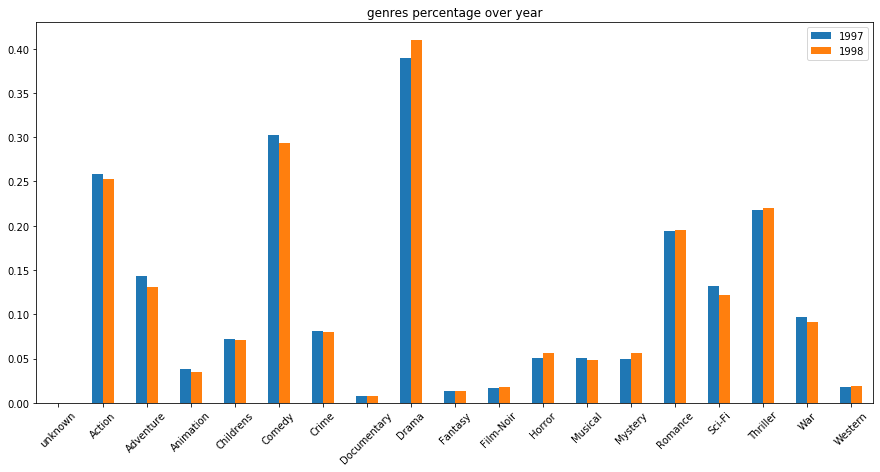

In [384]:
## the most rated movie genre every year
Popular = {}
Popular[1997] = data_1997[genre_cls].sum()/len(data_1997)
Popular[1998] = data_1998[genre_cls].sum()/len(data_1998)
Popular_year = pd.DataFrame(Popular) 
axes = Popular_year.plot.bar(rot=45,figsize=(15,7))
axes.set_title('genres percentage over year')

# 3. Graph analysis

## 3.1 user graph

In [386]:
def plt_graph(adjacency,data,title):
    graph_user = nx.from_numpy_matrix(adjacency)
    print('The number of connected components is {}'.format(nx.number_connected_components(graph_user)))
    coords = nx.spring_layout(graph_user,k=0.03)  # Force-directed layout.
    fig=plt.figure(figsize=(15, 10))
    labels = data.iloc[np.sort(nx.nodes(graph_user))]
    im=nx.draw_networkx_nodes(graph_user, coords, node_size=40,node_color=labels, cmap='tab20b',vmin=min(data), vmax=max(data))
    nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
    plt.title(title)
    plt.colorbar(im)
    return graph_user

In [395]:
# Initialize the adjacency matrix
n_users = len(user_data)
adjacency_user = np.zeros((n_users, n_users), dtype=float)
user_features1 =user_data.copy()[['user_id', 'age', 'gender', 'occupation', 'zip_code']]
user_features1['age_normal'] = user_features1['age']/max(user_features1['age'])
user_features1= pd.merge(user_features1,occupation_data,on='occupation',how='left')
user_features1['gender_id'] = user_features1['gender'].replace(['M','F'],[1,0])

In [396]:
user_features2=user_features1[['user_id','age','gender','occupation_id']].copy()
user_features2['avg_rating'] = data_merged[['user_id','item_id','rating']].groupby('user_id').mean()['rating'].values
user_features2['movie'] = data_merged[['user_id','item_id','rating']].groupby('user_id')['item_id'].apply(set).values

In [397]:
user_features1

user_id  age gender     occupation zip_code  age_normal  occupation_id  \
0          1   24      M     technician    85711    0.328767             19   
1          2   53      F          other    94043    0.726027             13   
2          3   23      M         writer    32067    0.315068             20   
3          4   24      M     technician    43537    0.328767             19   
4          5   33      F          other    15213    0.452055             13   
..       ...  ...    ...            ...      ...         ...            ...   
938      939   26      F        student    33319    0.356164             18   
939      940   32      M  administrator    02215    0.438356              0   
940      941   20      M        student    97229    0.273973             18   
941      942   48      F      librarian    78209    0.657534             10   
942      943   22      M        student    77841    0.301370             18   

     gender_id  
0            1  
1            0  
2            1  
3            1  
4            0  
..         ...  
938          0  
939          1  
940          1  
941          0  
942          1  

[943 rows x 8 columns]

In [398]:
user_features2

user_id  age gender  occupation_id  avg_rating  \
0          1   24      M             19    3.610294   
1          2   53      F             13    3.709677   
2          3   23      M             20    2.796296   
3          4   24      M             19    4.333333   
4          5   33      F             13    2.874286   
..       ...  ...    ...            ...         ...   
938      939   26      F             18    4.265306   
939      940   32      M              0    3.457944   
940      941   20      M             18    4.045455   
941      942   48      F             10    4.265823   
942      943   22      M             18    3.410714   

                                                 movie  
0    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1    {257, 258, 1, 10, 13, 14, 269, 272, 273, 274, ...  
2    {258, 260, 264, 268, 271, 272, 288, 294, 299, ...  
3    {258, 260, 264, 11, 271, 288, 294, 300, 301, 3...  
4    {1, 2, 17, 21, 24, 25, 29, 40, 42, 50, 62, 63,...  
..                                                 ...  
938  {257, 258, 255, 1028, 9, 266, 15, 274, 275, 40...  
939  {4, 516, 7, 8, 9, 521, 12, 14, 527, 529, 549, ...  
940  {257, 258, 1, 7, 15, 273, 147, 919, 408, 294, ...  
941  {514, 1028, 520, 528, 1050, 539, 31, 50, 71, 5...  
942  {2, 1028, 9, 11, 12, 526, 1044, 22, 23, 24, 10...  

[943 rows x 6 columns]

### Metric 1: measure similarity between users by their age, gender, occupation and residence.

In [640]:
def similarity(row,data):
    sim = pd.DataFrame(np.cos(row['age_normal']-data['age_normal']))
    sim['gender'] = (row['gender']==data['gender'])
    sim['occupation'] = (row['occupation']==data['occupation'])
    sim['zip_code'] = (row['zip_code'] == data['zip_code'])
    return sim

In [641]:
for i in range(n_users):
    adjacency_user[i,:] = similarity(user_features1.loc[i,:],user_features1).mean(axis=1)

#### Adjacency Matrix of users

Text(0.5, 1.05, 'Adjacency matrix')

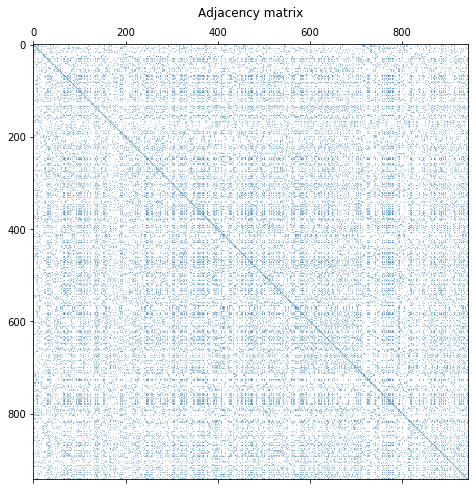

In [642]:
mask = adjacency_user<=0.5
adjacency = adjacency_user.copy()
adjacency[mask]=0

plt.figure(figsize=(8,8))
plt.spy(adjacency,markersize=0.1)
plt.title('Adjacency matrix')

#### Graph of Users with colors representing gender

No specific pattern is identified from the distribution of the colours of the nodes.

The number of connected components is 12


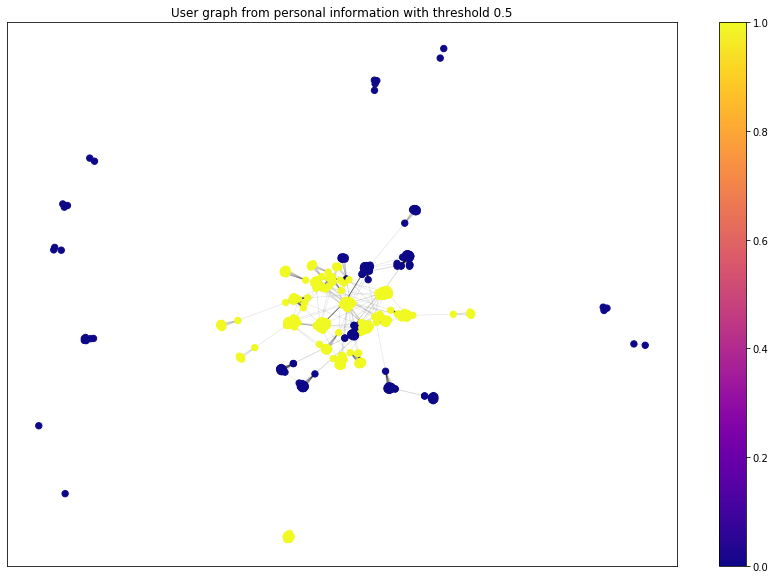

In [426]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['gender_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='plasma',vmin=0, vmax=1)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

#### Graph of Users with colous representing Occupation

We do observe that there is nice and clear pattern here, as the nodes of the same colour falls in one cluster, meaning that people of the same occupation do share lots of similarities with repsect to movies of interest.

The number of connected components is 12


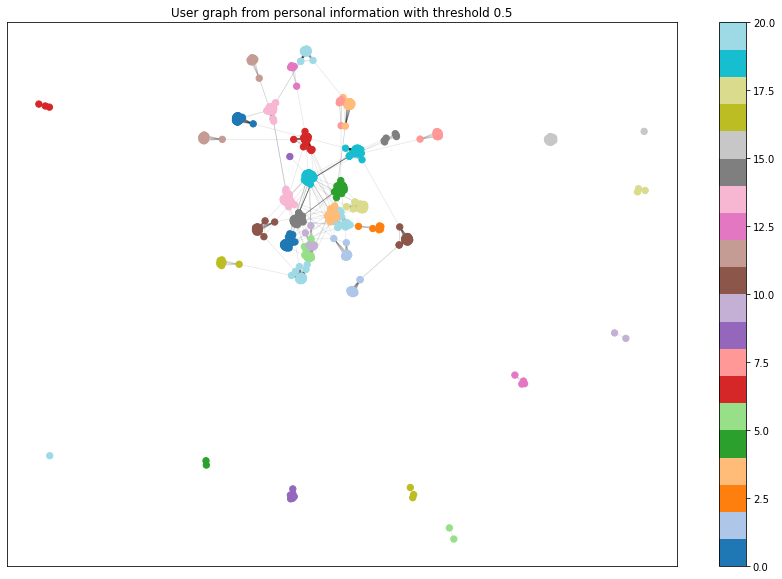

In [427]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

#### Graph of Users with colors representing Age
No specific pattern is identified from the distribution of the colours of the nodes.

The number of connected components is 12


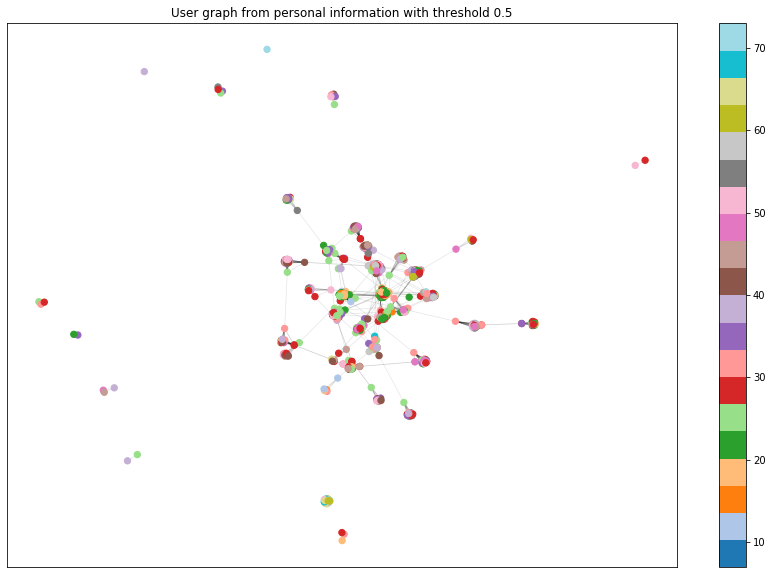

In [428]:
graph_user = nx.from_numpy_matrix(adjacency)
G = graph_user
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['age'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from personal information with threshold 0.5')
plt.colorbar(im)

#### Giant Components in User Graph

The number of nodes is is 903


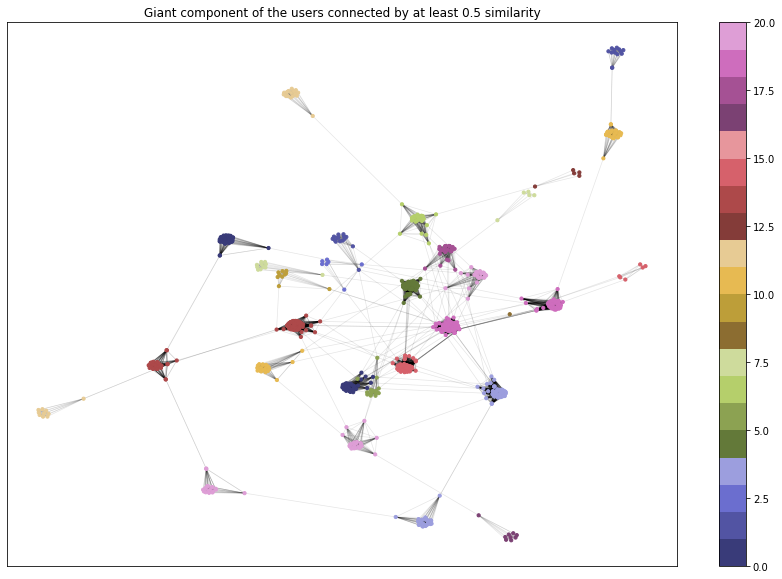

In [504]:
G = graph_user1
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.

print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels, cmap='tab20b',vmin=0, vmax=20)
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);

#### Below we analyse the grapn from the view of spectal theory

In [645]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    d = np.sum(adjacency, axis = 1)
    d_sqrt = np.sqrt(d)
    D = np.diag(1 / d_sqrt)
    if normalize:
        L = np.eye(adjacency.shape[0]) - (adjacency.T / d_sqrt).T / d_sqrt
    else:
        L = np.diag(d) - adjacency
    return L

def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    lamb, U = np.linalg.eigh(laplacian)
    
    return lamb, U

In [646]:
laplacian_norm = compute_laplacian(adjacency, normalize=True)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

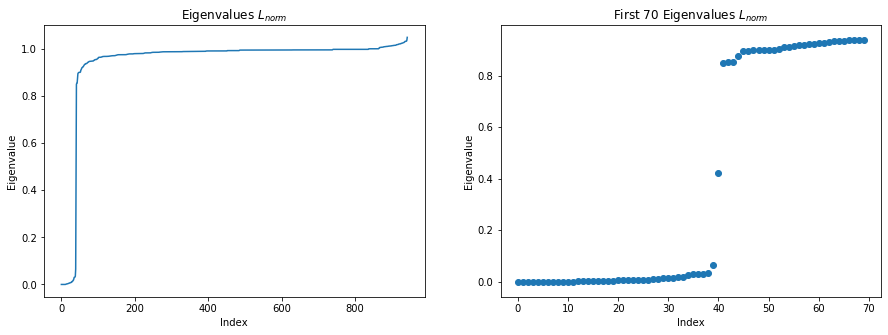

In [665]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')

plt.subplot(122)
first_k = 70
plt.scatter(range(first_k), lamb_norm[:first_k])
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('First 70 Eigenvalues $L_{norm}$')

plt.show()

In order to observe the properties of the eigenvalues calculated, we zoom in the eigenvalues and we observe that there is a significant gap of eighvalues as shown in the plot, which correspond to the fact that there are about 40 clear clusters in the graph. As we know that if the data has exactly k clear clusters, there will be a gap in the Laplacian spectrum after the k-th eigenvalue. Here the clusters are generally defined by the occupation of the users. 

### Metric 2: meaure similarities between users by how many common movies they have rated

The more common movies two users have rated, the more similar they are.

In [452]:
# Calulate the number of common movies they have rated between two users
def common_movie(i,j,data):
    left = data[data['user_id']==i+1]['movie'].values.tolist()[0]
    right = data[data['user_id']==j+1]['movie'].values.tolist()[0]
    common = left.intersection(right)
    return len(common)

In [453]:
adjacency_user2 = np.zeros((n_users, n_users), dtype=float)
for i in range(n_users):
    print(i)
    for j in range(n_users):
        if j<i:
            adjacency_user2[i,j] = adjacency_user2[j,i]
        else:
            adjacency_user2[i,j] = common_movie(i,j,user_features2)
            
np.save('data/adjacency_user2.npy', adjacency_user2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Histogram of the Median of common movies

Text(0.5, 1.0, 'histogram of number of common movies')

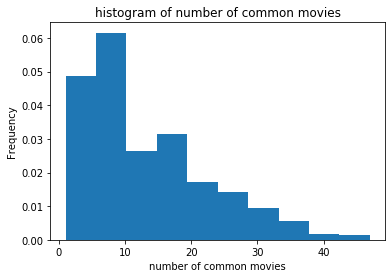

In [671]:
adjacency_user2 = np.load('data/adjacency_user2.npy')
median = []
for i in range(n_users):
    median.append(np.median(adjacency_user2[i,:]))

plt.hist(median, density=True)
plt.xlabel('number of common movies')
plt.ylabel('Frequency')
plt.title('histogram of number of common movies')

The adjacency matrix of **Metric 2**

Text(0.5, 1.05, 'Adjacency matrix')

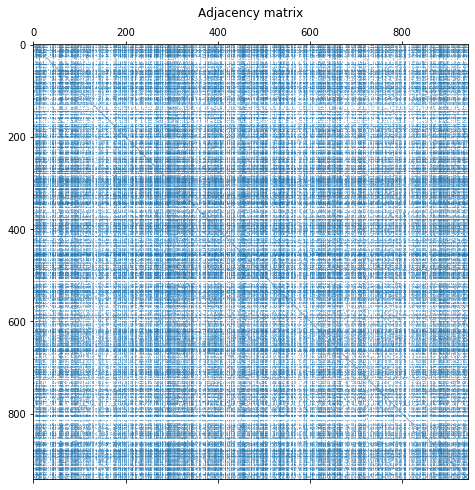

In [672]:
mask2 = adjacency_user2<20
adjacency = adjacency_user2.copy()
adjacency[mask2]=0

# Normalize 
adjacency_normalized = np.divide(adjacency,adjacency.max());
adjacency_normalized = adjacency
plt.figure(figsize=(8,8))
plt.spy(adjacency_normalized,markersize=0.1)
plt.title('Adjacency matrix')

#### Graph of Users with colors representing Occupation

The number of connected components is 1


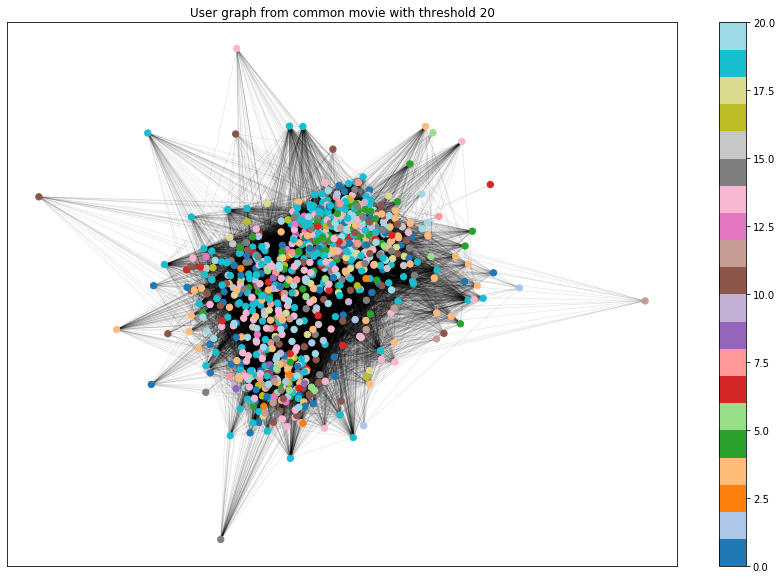

In [472]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features1['occupation_id'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

#### Graph of Users with colors representing Average Rating

The number of connected components is 1


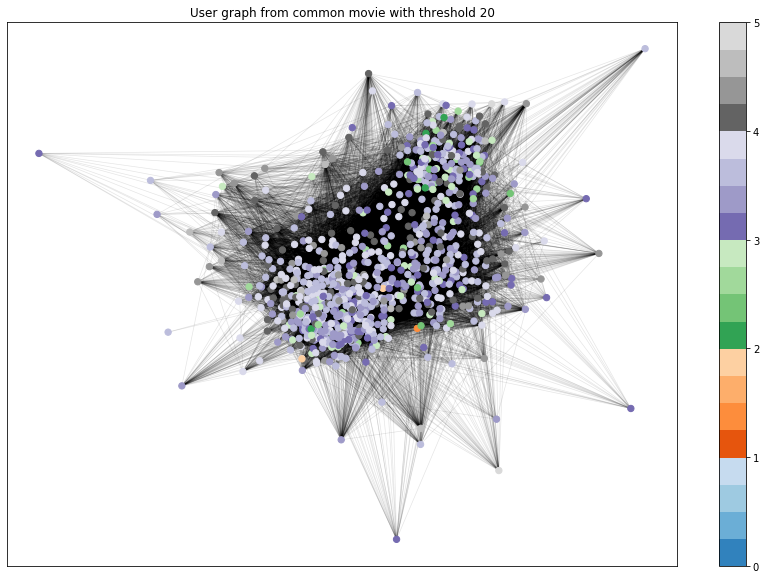

In [473]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features2['avg_rating'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20c',vmin=0, vmax=5)
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

#### Graph of Users with colors representing Age of user

The number of connected components is 1


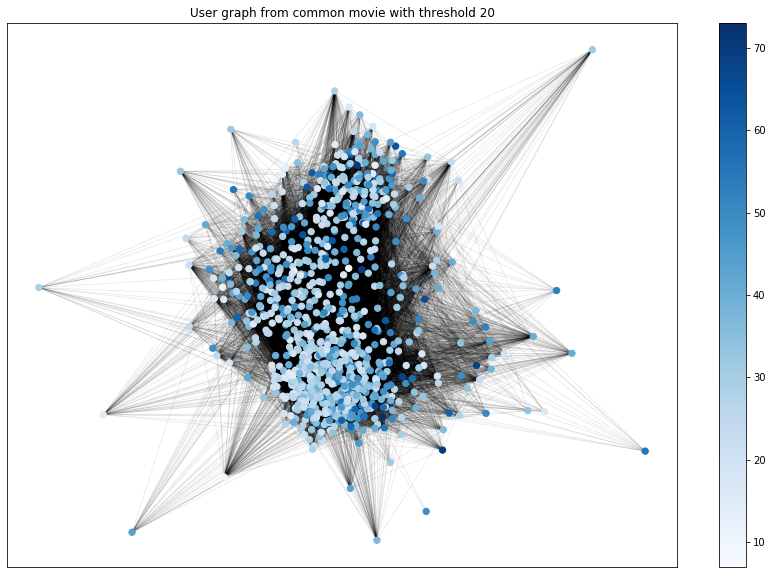

In [474]:
graph_user2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_user2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = user_features2['age'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='Blues',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

#### Giant component of the users connected by at least 20 common movies

The number of nodes is is 943


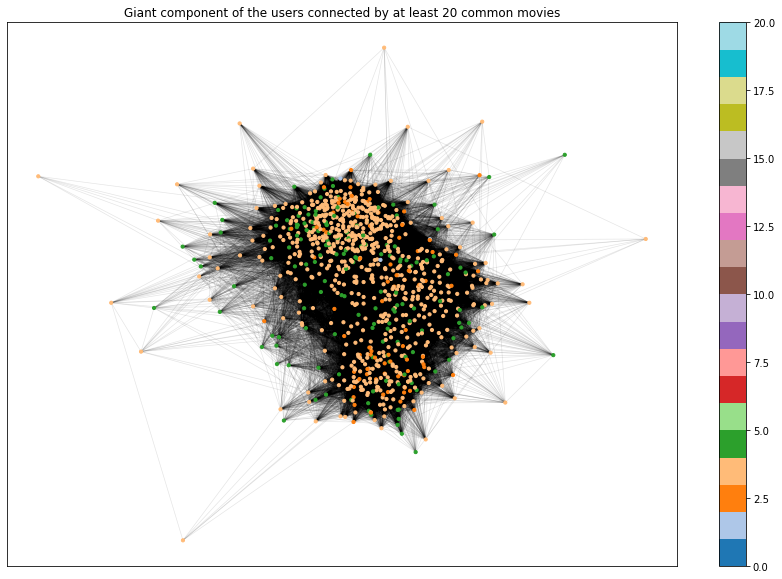

In [475]:
G = graph_user2
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.
print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = user_features2['avg_rating'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels, cmap='tab20',vmin=0, vmax=20)
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 20 common movies')
plt.colorbar(im);

In [673]:
laplacian_norm = compute_laplacian(adjacency_normalized, normalize=True)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

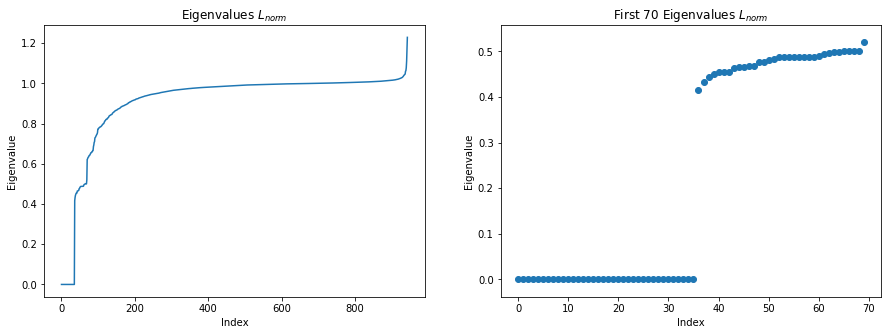

In [674]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')

plt.subplot(122)
first_k = 70
plt.scatter(range(first_k), lamb_norm[:first_k])
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('First 70 Eigenvalues $L_{norm}$')

plt.show()

In order to observe the properties of the eigenvalues calculated, we zoom in the eigenvalues and we observe that there is a significant gap of eighvalues as shown in the plot, which correspond to the fact that there are about 35 clear clusters in the graph. As we know that if the data has exactly k clear clusters, there will be a gap in the Laplacian spectrum after the k-th eigenvalue. However, the pattern here in this user graph is not clear as most of them are not really clusters by outliers. There is only one giant component that dominates the graph.

## 3.2 movie graph

### Metric 1: similarity between moives measured by genres

In [706]:
movie_features1 = movies_data[['item_id']+genre_cls]
movie_features1.loc[:, 'year_label'] = movies_data['year_label']
movie_features1.reset_index(drop = True, inplace = True)
movie_features1

item_id  unknown  Action  Adventure  Animation  Childrens  Comedy  \
0           1        0       0          0          1          1       1   
1           2        0       1          1          0          0       0   
2           3        0       0          0          0          0       0   
3           4        0       1          0          0          0       1   
4           5        0       0          0          0          0       0   
...       ...      ...     ...        ...        ...        ...     ...   
1677     1678        0       0          0          0          0       0   
1678     1679        0       0          0          0          0       0   
1679     1680        0       0          0          0          0       0   
1680     1681        0       0          0          0          0       1   
1681     1682        0       0          0          0          0       0   

      Crime  Documentary  Drama  ...  Film-Noir  Horror  Musical  Mystery  \
0         0            0      0  ...          0       0        0        0   
1         0            0      0  ...          0       0        0        0   
2         0            0      0  ...          0       0        0        0   
3         0            0      1  ...          0       0        0        0   
4         1            0      1  ...          0       0        0        0   
...     ...          ...    ...  ...        ...     ...      ...      ...   
1677      0            0      1  ...          0       0        0        0   
1678      0            0      0  ...          0       0        0        0   
1679      0            0      1  ...          0       0        0        0   
1680      0            0      0  ...          0       0        0        0   
1681      0            0      1  ...          0       0        0        0   

      Romance  Sci-Fi  Thriller  War  Western  year_label  
0           0       0         0    0        0      1995.0  
1           0       0         1    0        0      1995.0  
2           0       0         1    0        0      1995.0  
3           0       0         0    0        0      1995.0  
4           0       0         1    0        0      1995.0  
...       ...     ...       ...  ...      ...         ...  
1677        0       0         0    0        0      1998.0  
1678        1       0         1    0        0      1998.0  
1679        1       0         0    0        0      1998.0  
1680        0       0         0    0        0      1994.0  
1681        0       0         0    0        0      1996.0  

[1682 rows x 21 columns]

In [707]:
# Initialize the adjacency matrix
n_movies = len(movie_features1)
adjacency_movie = np.zeros((n_movies, n_movies), dtype=float)

In [743]:
for i in range(n_movies):
    adjacency_movie[i,:] = np.logical_and(movie_features1.loc[i,:][genre_cls], movie_features1[genre_cls])\
    .sum(axis=1)

Text(0.5, 1.05, 'Adjacency matrix')

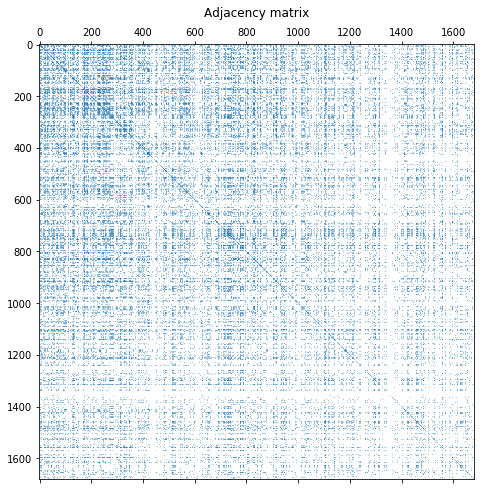

In [745]:
# Normalize 
mask_movie = adjacency_movie<2
adjacency = adjacency_movie.copy()
adjacency[mask_movie] = 0 
adjacency_movie_nor =np.divide(adjacency,adjacency.max())
plt.figure(figsize=(8,8))
plt.spy(adjacency_movie_nor,markersize=0.1)
plt.title('Adjacency matrix')

#### Movie graph with colors representing release year

The number of connected components is 837


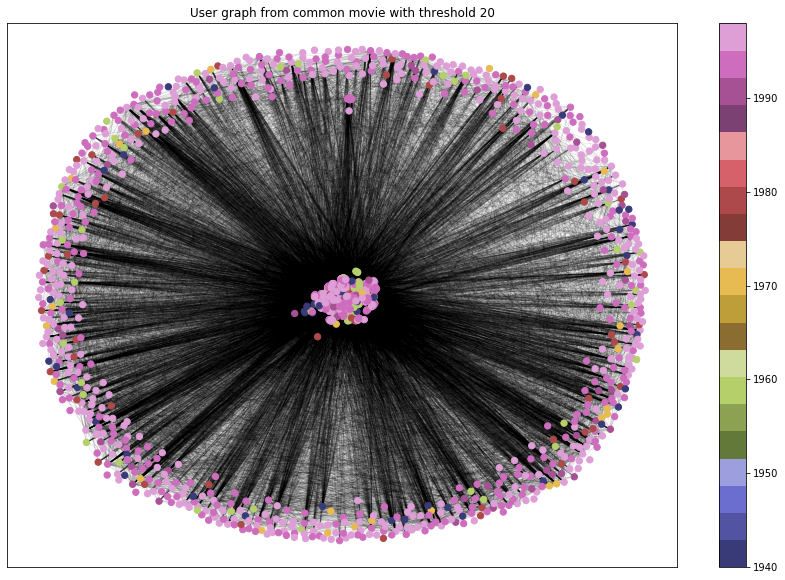

In [556]:
graph_movie1 = nx.from_numpy_matrix(adjacency_movie_nor)
G = graph_movie1
print('The number of connected components is {}'.format(nx.number_connected_components(G)))
coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = movie_features1['year_label'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20b',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

#### Giant Component

The number of nodes is is 839


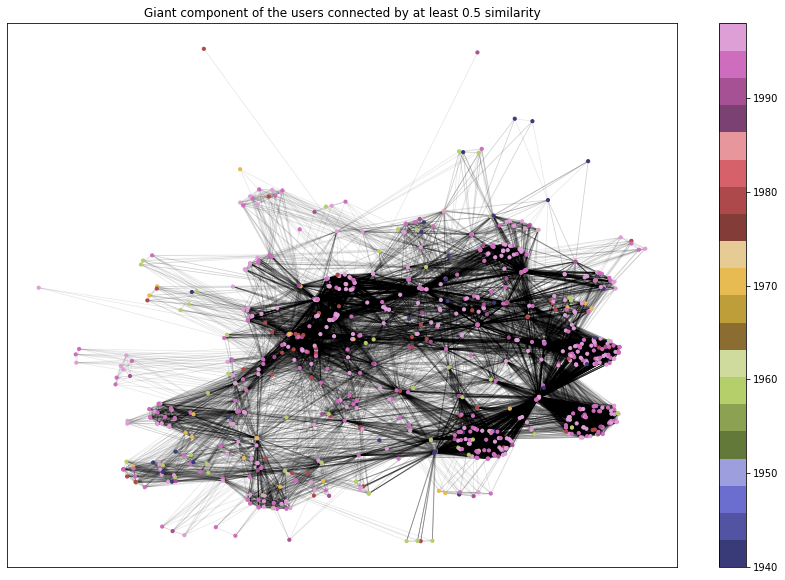

In [557]:
G = graph_movie1
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.

print('The number of nodes is is {}'.format(Gc.number_of_nodes()))
labels = movie_features1['year_label'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels,cmap='tab20b',vmin=min(labels),vmax=max(labels))
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);

### Metric 2: Similarity measured by the common users who have rated them

In [595]:
movie_features2 = movie_features1[['item_id','year_label']].copy()
movie_features2['avg_rating'] = data_merged[['user_id','item_id','rating']].groupby('item_id').mean()['rating'].values
movie_features2['user'] = data_merged[['user_id','item_id','rating']].groupby('item_id')['user_id'].apply(set).values

In [596]:
movie_features2

item_id  year_label  avg_rating  \
0           1      1995.0    3.878319   
1           2      1995.0    3.206107   
2           3      1995.0    3.033333   
3           4      1995.0    3.550239   
4           5      1995.0    3.302326   
...       ...         ...         ...   
1677     1678      1998.0    1.000000   
1678     1679      1998.0    3.000000   
1679     1680      1998.0    2.000000   
1680     1681      1994.0    3.000000   
1681     1682      1996.0    3.000000   

                                                   user  
0     {1, 2, 5, 6, 10, 13, 15, 16, 17, 18, 20, 21, 2...  
1     {1, 5, 521, 13, 532, 22, 536, 30, 543, 551, 42...  
2     {1, 523, 534, 537, 548, 551, 43, 49, 561, 569,...  
3     {1, 514, 7, 10, 12, 13, 524, 527, 16, 18, 19, ...  
4     {1, 13, 21, 28, 546, 551, 43, 44, 562, 577, 72...  
...                                                 ...  
1677                                              {863}  
1678                                              {863}  
1679                                              {863}  
1680                                              {896}  
1681                                              {916}  

[1682 rows x 4 columns]

In [597]:
def common_user(i,j,data):
    left = data[data['item_id']==i+1]['user'].values.tolist()[0]
    right = data[data['item_id']==j+1]['user'].values.tolist()[0]
    common = left.intersection(right)
    return len(common)

In [598]:
adjacency_movie2 = np.zeros((n_movies, n_movies), dtype=float)
for i in range(n_movies):
    print(i)
    for j in range(n_movies):
        if j<i:
            adjacency_movie2[i,j] = adjacency_movie2[j,i]
        else:
            adjacency_movie2[i,j] = common_user(i,j,movie_features2)
np.save('adjacency_movie2.npy', adjacency_movie2)

0
1
2


KeyboardInterrupt: 

Text(0.5, 1.0, 'histogram of number of common user')

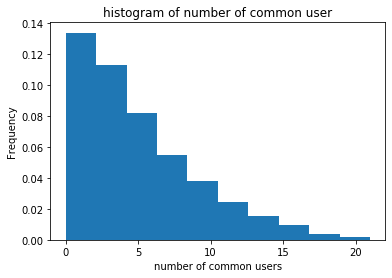

In [630]:
adjacency_movie2 = np.load('data/adjacency_movie2.npy')
median = []
for i in range(n_users):
    median.append(np.median(adjacency_movie2[i,:]))

plt.hist(median, density=True)
plt.xlabel('number of common users')
plt.ylabel('Frequency')
plt.title('histogram of number of common user')

Text(0.5, 1.05, 'Adjacency matrix')

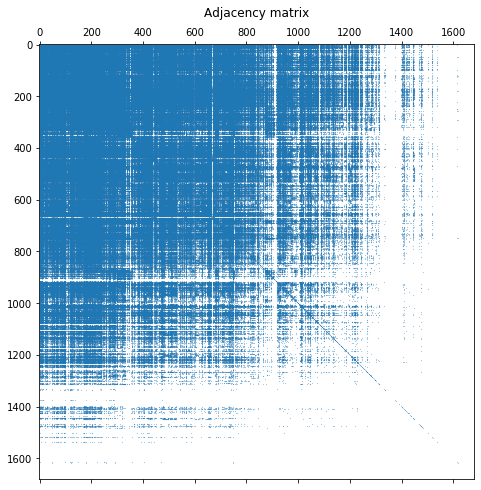

In [631]:
mask2 = adjacency_movie2<8
adjacency = adjacency_movie2.copy()
adjacency[mask2]=0
# Normalize 
adjacency_normalized = np.divide(adjacency,adjacency.max());
plt.figure(figsize=(8,8))
plt.spy(adjacency_normalized,markersize=0.1)
plt.title('Adjacency matrix')

The number of connected components is 475


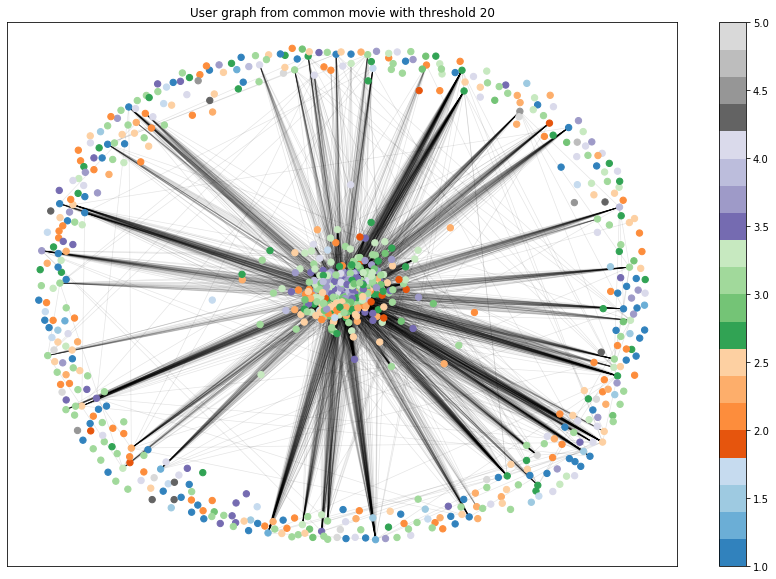

In [632]:
graph_movie2 = nx.from_numpy_matrix(adjacency_normalized)
G = graph_movie2
print('The number of connected components is {}'.format(nx.number_connected_components(G)))

coords = nx.spring_layout(G,k=0.03)  # Force-directed layout.
fig=plt.figure(figsize=(15, 10))
labels = movie_features2['avg_rating'].iloc[np.sort(nx.nodes(G))]
im=nx.draw_networkx_nodes(G, coords, node_size=40,node_color=labels, cmap='tab20c',vmin=min(labels), vmax=max(labels))
nx.draw_networkx_edges(graph_user, coords, alpha=0.1, width=0.7)
plt.title('User graph from common movie with threshold 20')
plt.colorbar(im)

#### Giant Component of the graph

The number of nodes is is 1208


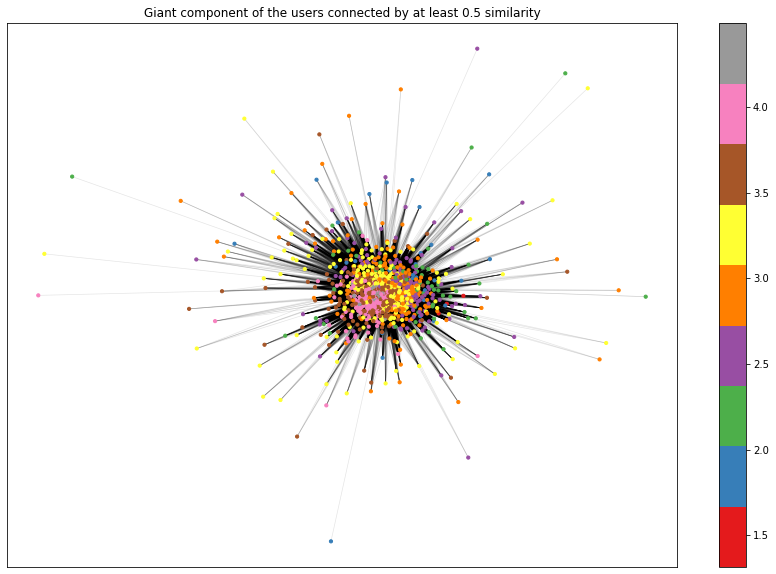

In [633]:
G = graph_movie2
Gc = max([G.subgraph(c) for c in nx.connected_components(G)], key=len)
coords_Gc = nx.spring_layout(Gc,k=0.03)  # Force-directed layout.
print('The number of nodes is is {}'.format(Gc.number_of_nodes()))

labels = movie_features2['avg_rating'].iloc[np.sort(nx.nodes(Gc))]
fig=plt.figure(figsize=(15, 10))
im=nx.draw_networkx_nodes(Gc, coords_Gc, node_size=10,node_color=labels,cmap='Set1',vmin=min(labels),vmax=max(labels))
nx.draw_networkx_edges(Gc, coords_Gc, alpha=0.1, width=0.7)
plt.title('Giant component of the users connected by at least 0.5 similarity')
plt.colorbar(im);

In [608]:
laplacian_norm = compute_laplacian(adjacency_movie2, normalize=True)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

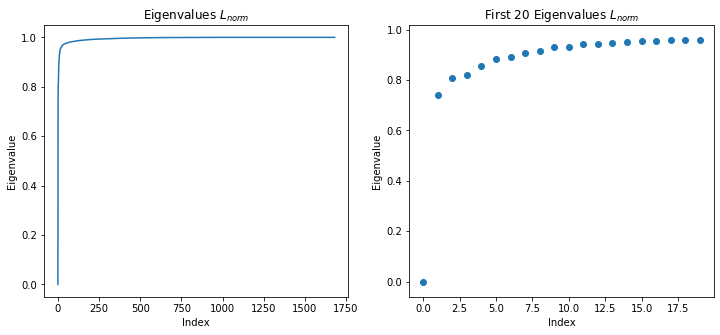

In [628]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.subplot(122)
first_k = 20
plt.scatter(range(first_k), lamb_norm[:first_k])
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('First 20 Eigenvalues $L_{norm}$')
plt.show()

In order to observe the properties of the eigenvalues calculated, we plot all the eigenvalues and the first 20 eigenvalues. In the second plot, we observe that the most significant gap is between the first eigen value and the second one, which correspond to the fact that there is one clear cluster (the giant component) in the graph. As we know that if the data has exactly k clear clusters, there will be a gap in the Laplacian spectrum after the k -th eigenvalue.